<a href="https://colab.research.google.com/github/kaiquefreire05/heart-failure-prediction/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [60]:
# Importações

import pandas as pd # procesamento de dados
import numpy as np # cálcula de matriz multidimensional
import matplotlib.pyplot as plt # visualização de gráficos
import seaborn as sns # visualização de gráficos

from sklearn.preprocessing import StandardScaler # escalonamento dos valores
from sklearn.model_selection import train_test_split # dividir entre base de treinamento e teste
from sklearn.model_selection import RandomizedSearchCV # busca de melhores parâmetros aleatoriamente

from xgboost import XGBClassifier # modelo de classificação
from sklearn.neural_network import MLPClassifier # rede neural de classificação
from sklearn.ensemble import RandomForestClassifier # random forests
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.svm import SVC # support vector machine

from sklearn.metrics import classification_report # tabela de classificação
from sklearn.metrics import accuracy_score # taxa de acurácia
from sklearn.metrics import confusion_matrix # matriz de confusão

# Carregamento e análise exploratória

In [61]:
# Carregando o dataset

df = pd.read_csv('/content/drive/MyDrive/datasets/heart.csv') # lendo a base de dados e atribuindo a variável

In [62]:
# Mostrando as 5 primeiras linhas da base de dados

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [63]:
# Mostrando as 5 últimas linhas da base de dados

df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [64]:
# Tamanha da base de dados

print(f'A base de dados tem {df.shape[0]} linhas e {df.shape[1]} colunas.')

A base de dados tem 918 linhas e 12 colunas.


In [65]:
# Descrição da base de dados

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [66]:
# Informações da base de dados

In [67]:
# Verificando se existem valores nulos na base de dados

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

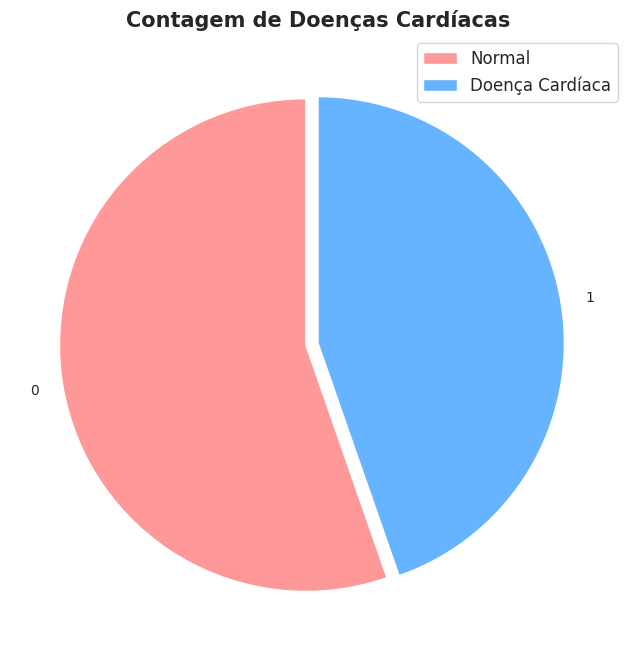

In [68]:
# Contagem de casos de doença cardiaca e normal

colors = ['#ff9999', '#66b3ff'] # cores atribuídas para as partes do gráfico

plt.figure(figsize=(12, 8)) # criando e definindo tamanho da figura
plt.pie(x= df['HeartDisease'].value_counts(), labels=df['HeartDisease'].unique(), colors= colors, startangle=90, pctdistance=0.85, explode=(0.05, 0)) # fazendo contagem
plt.title('Contagem de Doenças Cardíacas', fontsize= 15, fontweight= 'bold') # definindo título
plt.legend(labels=('Normal', 'Doença Cardíaca'), loc= 'upper right', fontsize= 'large') # adicionando as legendas
plt.show() # plotando o gráfico

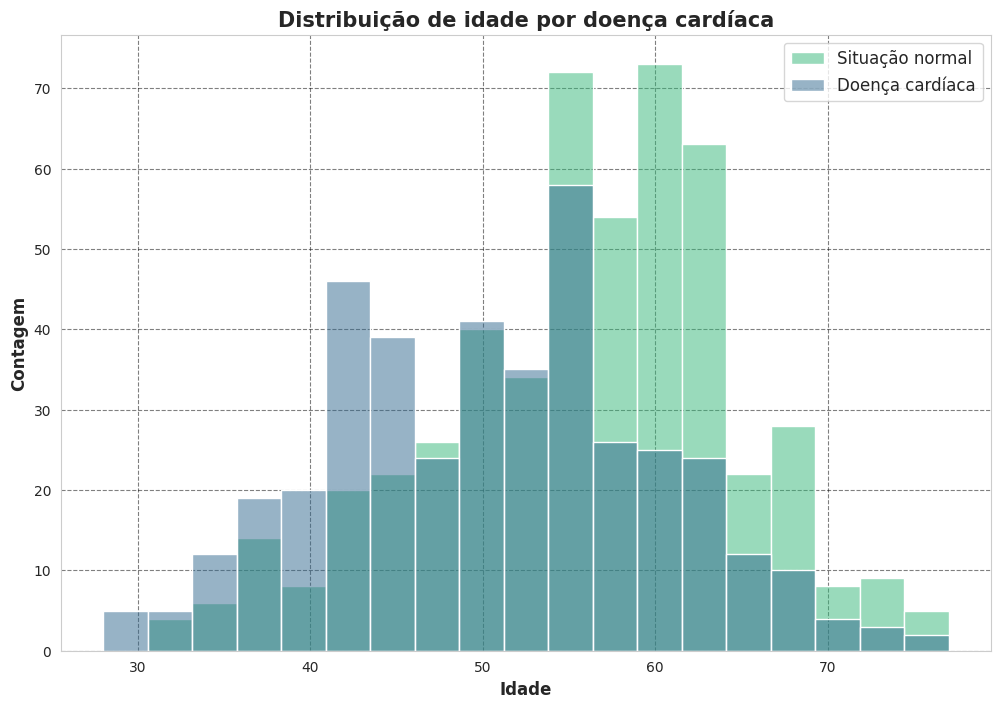

In [69]:
# Distribuição de idade por doença cardíaca

plt.figure(figsize=(12, 8)) # criando e definindo o tamanho da figura
sns.histplot(data=df, x='Age', hue='HeartDisease', palette='viridis') # passando o eixo x e a contagem dos resultados das doenças
plt.title('Distribuição de idade por doença cardíaca', fontsize= 15, fontweight= 'bold') # criando título
plt.xlabel('Idade', fontsize= 12, fontweight= 'bold') # adicionando label X
plt.ylabel('Contagem', fontsize= 12, fontweight= 'bold') # adicionando label Y
plt.legend(labels= ('Situação normal', 'Doença cardíaca'), loc= 'upper right', fontsize= 'large') # adicionado as legendas
plt.grid(True, linestyle= '--', color= 'black', alpha=0.5) # mostranda e definindo estilo das linhas do gráfico
plt.show() # plotando a figura

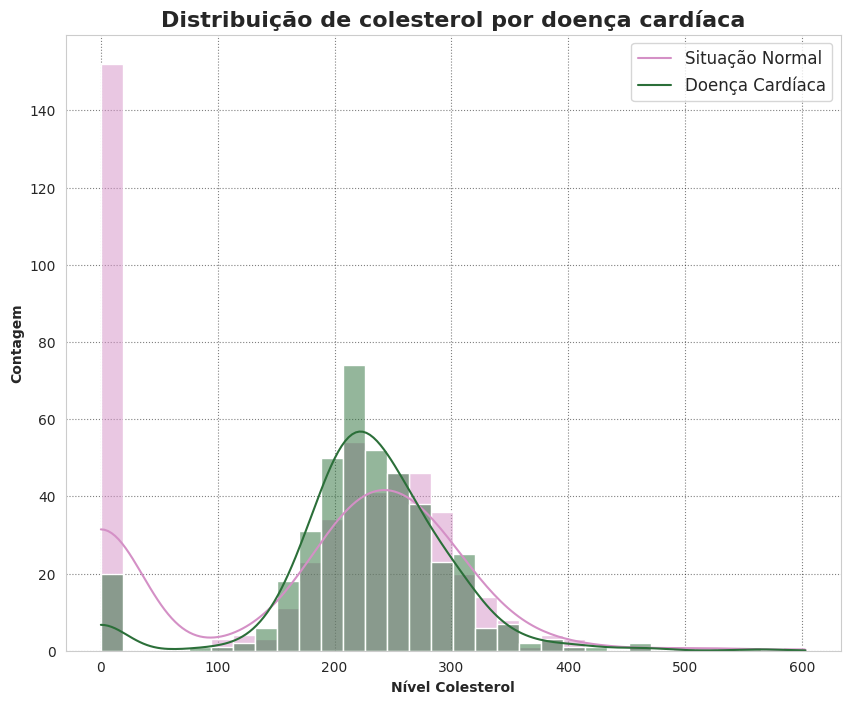

In [70]:
# Distribuição de colesterol por doença cardíaca

plt.figure(figsize= (10, 8)) # criando figura e definindo o tamanho da figura
sns.histplot(data= df, x= df['Cholesterol'], hue=df['HeartDisease'], palette= 'cubehelix', kde= True) # plotando barras por nvl colesterol e mostrando a situação
plt.title('Distribuição de colesterol por doença cardíaca', fontsize= 16, fontweight= 'bold') # definindo título
plt.xlabel('Nível Colesterol', fontsize= 10, fontweight= 'bold') # definindo eixo X
plt.ylabel('Contagem', fontsize= 10, fontweight= 'bold') # definindo eixo Y
plt.legend(labels= ('Situação Normal', 'Doença Cardíaca'), fontsize= 'large', loc= 'upper right') # adicionando as legendas
plt.grid(True, linestyle= ':', alpha= 0.5, color= 'black') # mostranda e personalizando as linhas do gráfico
plt.show() # plotando a figura

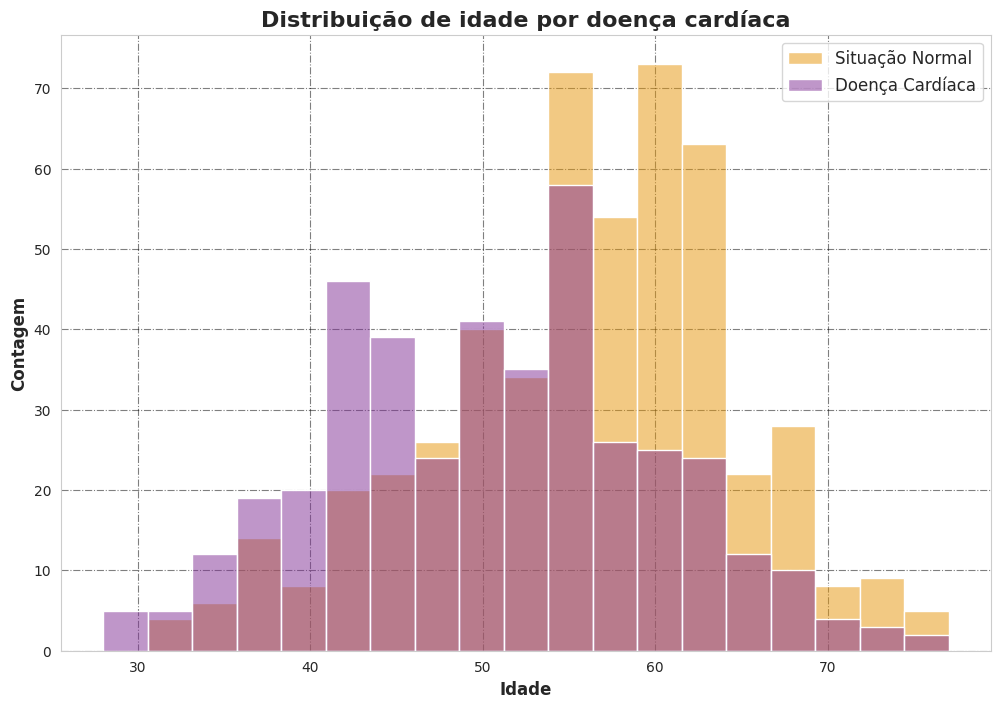

In [71]:
# Distribuição de idade por doença cardíaca

plt.figure(figsize= (12, 8)) # criando a figura e definindo seu tamanho
sns.histplot(data= df, x= 'Age', hue= 'HeartDisease', palette= 'CMRmap') # fazendo distribuição de situação por idade e passando paleta de cor
plt.title('Distribuição de idade por doença cardíaca', fontsize= 16, fontweight= 'bold') # definindo título
plt.xlabel('Idade', fontsize= 12, fontweight= 'bold') # definindo eixo X
plt.ylabel('Contagem', fontsize= 12, fontweight = 'bold') # definindo eixo Y
plt.legend(labels= ('Situação Normal', 'Doença Cardíaca'), fontsize= 'large') # criando as legendas
plt.grid(True, linestyle= 'dashdot', alpha= 0.5, color= 'black') # mostrando o grid e mudando seu estilo
plt.show() # plotando a figura

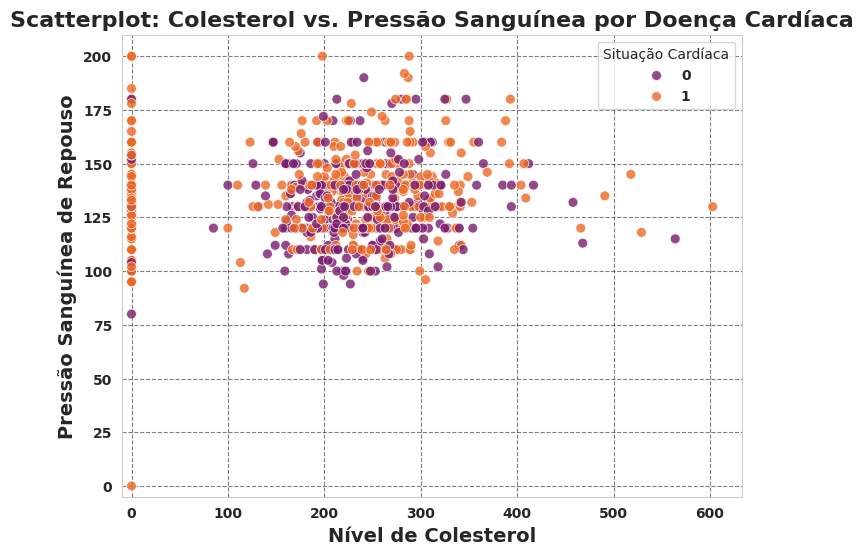

In [72]:
# Relação colesterol e pressão arterial

# s= tamanho , alpha= transparência

plt.figure(figsize=(8, 6)) # criando figura e definindo o tamanho
sns.scatterplot(data=df, x=df['Cholesterol'], y=df['RestingBP'], hue=df['HeartDisease'], palette='inferno', s=50, alpha=0.8) # criando os eixos x,y e a comparação
plt.title('Scatterplot: Colesterol vs. Pressão Sanguínea por Doença Cardíaca', fontsize=16, fontweight='bold') # definindo título
plt.xlabel('Nível de Colesterol', fontsize=14, fontweight='bold') # definindo eixo X
plt.ylabel('Pressão Sanguínea de Repouso', fontsize=14, fontweight='bold') # definindo eixo Y
plt.xlim(-10, None) # limites do eixo X
plt.ylim(-5, None) # limites do eixo Y
plt.grid(True, linestyle='--', alpha=0.5, color= 'black')  # adiciona grades de fundo
plt.legend(title= 'Situação Cardíaca', prop={'weight':'bold'}, fontsize= 'medium') # criando as legendas
plt.xticks(fontsize=10, fontweight='bold') # linhas do eixo x
plt.yticks(fontsize=10, fontweight='bold') # linhas do eixo y
plt.show() # plotando a figura

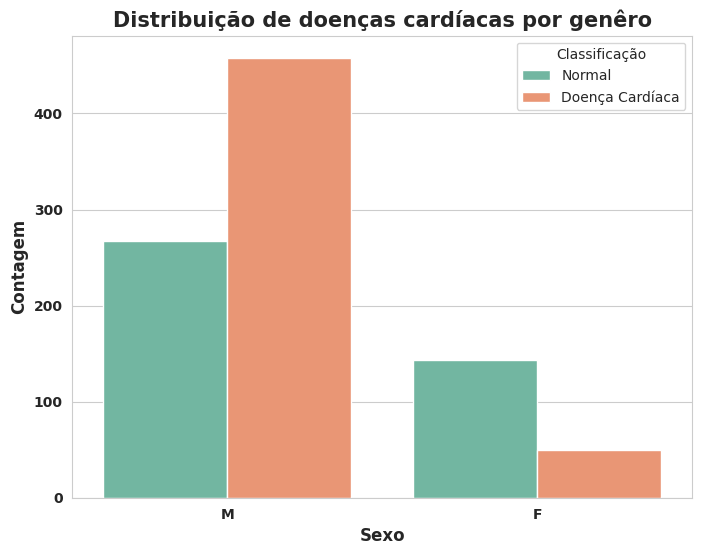

In [73]:
# Contagem de condição cardíaca por sexo

plt.figure(figsize= (8, 6)) # criando a figura e definindo o tamanho
sns.countplot(data= df, x= df['Sex'], hue= df['HeartDisease'], palette= 'Set2') # passando a contagem dos sexos e fazendo a contagem da situação cardíaca
plt.title('Distribuição de doenças cardíacas por genêro', fontsize= 15, fontweight= 'bold') # criando título
plt.xlabel('Sexo', fontsize= 12, fontweight= 'bold') # definido eixo X
plt.ylabel('Contagem', fontsize= 12, fontweight= 'bold') # definindo eixo Y
plt.xticks(fontsize= 10, fontweight= 'bold') # linhas do eixo X
plt.yticks(fontsize= 10, fontweight= 'bold') # linhas do eixo Y
plt.legend(title= 'Classificação', labels= ('Normal', 'Doença Cardíaca'), loc= 'upper right') # modificando as legendas
plt.show() # plotando a figura

# Pré-processamento

In [74]:
# Pré-processamento

x = df.drop(['HeartDisease'], axis= 1)
y= df['HeartDisease']

In [75]:
# Transformando as colunas categóricas

x_cat = pd.get_dummies(x, drop_first= True)

In [76]:
# Fazendo o escalonamento dos valores

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_cat)
x_scaled

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.8235563 ,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  1.21424608,
         0.99782372, -0.86905588],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.8235563 ,
         0.99782372, -0.86905588],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.8235563 ,
        -1.00218103,  1.15067399]])

In [77]:
# Fazendo divisão entre base de treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.3, random_state= 42)

print(f'O tamanho das bases de treino é {x_train.shape}, {y_train.shape}')
print(f'O tamanho das bases de teste é {x_test.shape}, {y_test.shape}')

O tamanho das bases de treino é (642, 15), (642,)
O tamanho das bases de teste é (276, 15), (276,)


# Função de treino

In [78]:
# Função para busca dos melhores parâmetros

def training_model_randomized(modelo, x_train, y_train, param_dist, n_iter):
    """Trains a machine learning model using RandomizedSearchCV and returns score and the best parameters.
    Args:
        model: The machine learning model to be trained.
        x_train: The training data (features).
        y_train: The training labels (targets).
        param_dist: A dictionary containing the parameters to be tested with RandomizedSearchCV.
        n_iter: Number of parameter settings that are sampled.

    Returns:
        A dictionary containing:
            'score': The best score obtained during training.
            'parametros': The best parameters found by RandomizedSearchCV.
    """
    randomized_search = RandomizedSearchCV(modelo, param_dist, n_iter=n_iter)
    randomized_search.fit(x_train, y_train)
    return {'score': randomized_search.best_score_, 'parametros': randomized_search.best_params_}

# Criação e treinamento de modelos

In [79]:
# Criando os modelos de machine learning

xgb_classifier = XGBClassifier() # xgboost
random_classifier = RandomForestClassifier() # random forests
svc_classifier = SVC() # svm (support vector machine)
bayes_classifier = GaussianNB() # naive bayes
neural_classifier = MLPClassifier() # rede neural artificial

results_algs = []

## XGBoost

In [80]:
# XGBoost

param_grid_xgb = { # dicionário de parâmetros
    'n_estimators': [100, 200, 300, 800,850],
    'learning_rate': [0.01, 0.001, 0.1, 0.2],
    'max_depth': [3, 4, 5,6],
}

teste_xgb = training_model_randomized(modelo= XGBClassifier(), x_train= x_train, y_train= y_train, param_dist= param_grid_xgb, n_iter= 20)
best_params_xgb = teste_xgb['parametros']
print(f'Os melhores parâmetros do algoritmo xgboost foram: {best_params_xgb}')
print(f'O melhor score do algoritmo foi de: {teste_xgb["score"]}')

Os melhores parâmetros do algoritmo xgboost foram: {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.01}
O melhor score do algoritmo foi de: 0.8613008720930232


In [81]:
# Treinando modelo efetivo

xgb_classifier.set_params(**best_params_xgb)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
# Previsões e acurácia

results_xgb = xgb_classifier.predict(x_test) # prevendo as classificações
accuracy_xgb = accuracy_score(y_test, results_xgb) # obtendo accuracy score
print(f'A acurácia do algoritmo foi de: {accuracy_xgb}')
results_algs.append(accuracy_xgb) # adicionando o resultado do accuracy na lista

A acurácia do algoritmo foi de: 0.8913043478260869


In [83]:
# Tabela de classificação

print(f'Relatório de classificação: \n{classification_report(y_test, results_xgb)}')

Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       112
           1       0.91      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



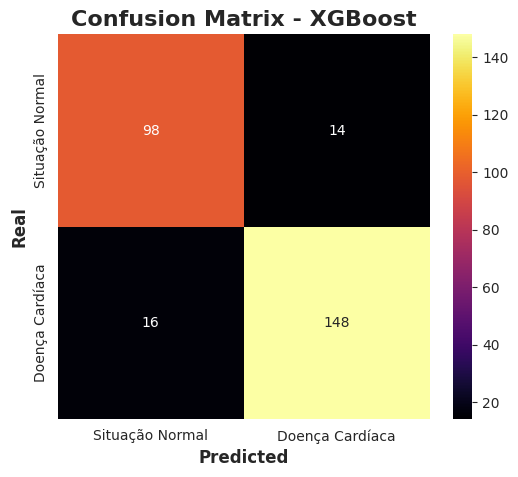

In [84]:
# Matriz de confusão

confuse_xgb = confusion_matrix(y_test, results_xgb)
tags = ['Situação Normal', 'Doença Cardíaca']

plt.figure(figsize= (6, 5)) # criando figura e definindo tamanho
sns.heatmap(confuse_xgb, annot=True, fmt='d', cmap='inferno', xticklabels=tags, yticklabels=tags) # passando confuse, mudando paleta e definindo as tags
plt.xlabel('Predicted', fontsize= 12, fontweight= 'bold') # definindo label X
plt.ylabel('Real', fontsize= 12, fontweight= 'bold') # definindo label Y
plt.title('Confusion Matrix - XGBoost', fontsize= 16, fontweight= 'bold') # personalizando título
plt.show() # plotando a figura

## Random Forests

In [85]:
# Random Forest

param_grid_rf = { # dicionário de parâmetros
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

teste_rf = training_model_randomized(modelo= RandomForestClassifier(), x_train= x_train, y_train= y_train, param_dist= param_grid_rf, n_iter= 20)
best_params_rf = teste_rf['parametros']
print(f'Os melhores parâmetros do algoritmo de Random Forest foi: {best_params_rf}')
print(f'O melhor score do algoritmo de Random Forest foi: {teste_rf["score"]}')

Os melhores parâmetros do algoritmo de Random Forest foi: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
O melhor score do algoritmo de Random Forest foi: 0.8659883720930232


In [86]:
# Treinando modelo efetivo

random_classifier.set_params(**best_params_rf)
random_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300)

In [87]:
# Previsões e acurácia

results_rf = random_classifier.predict(x_test) # prevendo
accuracy_rf = accuracy_score(y_test, results_rf) # obtendo accuracy score
print(f'A acurácia do algoritmo foi: {accuracy_rf}')
results_algs.append(accuracy_rf)

A acurácia do algoritmo foi: 0.8768115942028986


In [88]:
# Relatório de classificação

print(f'Relatório de classificação: \n{classification_report(y_test, results_rf)}')

Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       112
           1       0.89      0.90      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



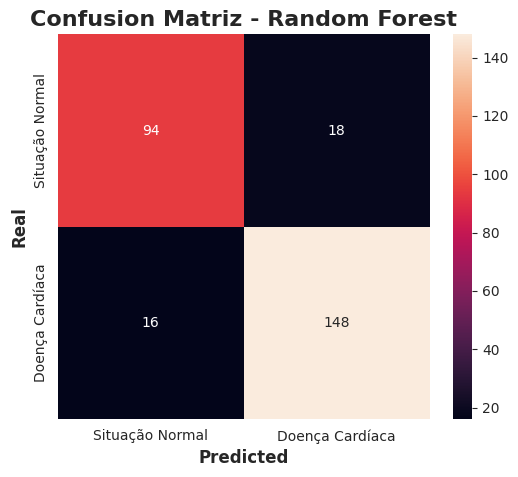

In [89]:
# Matriz de confusão

confuse_rf = confusion_matrix(y_test, results_rf) # obtendo matriz de confusão
tags = ['Situação Normal', 'Doença Cardíaca']

plt.figure(figsize= (6, 5)) # criando a figura e definindo o tamanho
sns.heatmap(confuse_rf, annot=True, fmt='d', cmap='rocket', xticklabels= tags, yticklabels= tags) # passando confuse, mudando paleta e definindo as tags
plt.xlabel('Predicted', fontsize= 12, fontweight= 'bold') # editando label X
plt.ylabel('Real', fontsize= 12, fontweight= 'bold') # editando label Y
plt.title('Confusion Matriz - Random Forest', fontsize= 16, fontweight= 'bold') # personalizando título
plt.show() # plotando a figura

# annot= True, faz mostrar os números no gráfico
# fmt= 'd', formata os números para inteiro

## SVM (support vector machine)

In [90]:
# SVC

param_grid_svm = { # dicíonarios de parâmetros
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced'],
    'random_state': [42]
}

teste_svm = training_model_randomized(modelo= SVC(), x_train= x_train, y_train= y_train, param_dist= param_grid_svm, n_iter= 20)
best_params_svm = teste_svm['parametros']
print(f'Os melhores parâmetros do algoritmo svm foi: {best_params_svm}')
print(f'O melhor score do algoritmo svm foi: {teste_svm["score"]}')

Os melhores parâmetros do algoritmo svm foi: {'random_state': 42, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'class_weight': 'balanced', 'C': 0.1}
O melhor score do algoritmo svm foi: 0.855062984496124


In [91]:
# Treinando modelo efetivo

svc_classifier.set_params(**best_params_svm) # passando o dicionário com os melhor parâmetros
svc_classifier.fit(x_train, y_train) # treinando com as bases de treino

SVC(C=0.1, class_weight='balanced', degree=2, gamma='auto', random_state=42)

In [92]:
# Fazendo previsão e armazenando accuracy

results_svm = svc_classifier.predict(x_test) # prevendo
accuracy_svm = accuracy_score(y_test, results_svm) # obtendo acurácia
print(f'A taxa de acurácia do algoritmo svm foi: {accuracy_svm}')
results_algs.append(accuracy_svm)

A taxa de acurácia do algoritmo svm foi: 0.8804347826086957


In [93]:
# Relatório de classificação

print(f'Relátório de classificação: \n{classification_report(y_test, results_svm)}')

Relátório de classificação: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.91      0.89      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



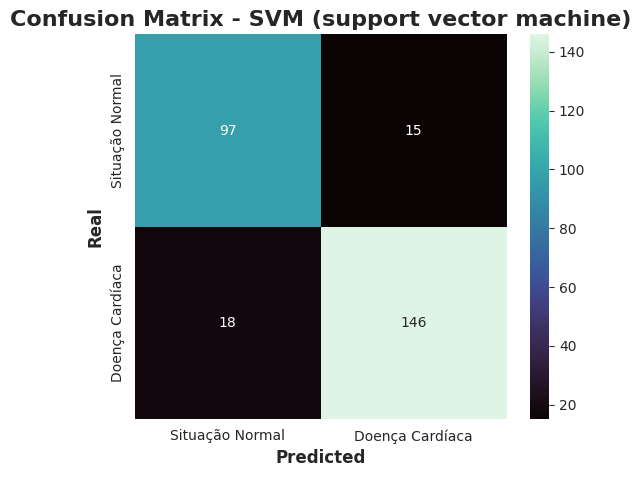

In [94]:
# Matriz de connfusão

confuse_svm = confusion_matrix(y_test, results_svm) # armazenando matriz de confusão na variável

tags = ['Situação Normal', 'Doença Cardíaca'] # tags dos resultados

plt.figure(figsize= (6, 5)) # criando figura e definindo o tamanho
sns.heatmap(confuse_svm, annot= True, fmt= 'd', cmap= 'mako', xticklabels= tags, yticklabels= tags) # passando matriz de confusão, passando tags, mostrando os números e mudando paleta
plt.title('Confusion Matrix - SVM (support vector machine)', fontsize= 16, fontweight= 'bold') # definindo título
plt.xlabel('Predicted', fontsize= 12, fontweight= 'bold') # definindo eixo X
plt.ylabel('Real', fontsize= 12, fontweight= 'bold') # definindo eixo Y
plt.show() # plotando figura

## Naive Bayes

In [95]:
# Naive Bayes, treinando modelo efetivo e obtendo resultados

bayes_classifier.fit(x_train, y_train) # fazendo o treinamendo
results_bayes = bayes_classifier.predict(x_test) # prevendo os resultados da base de teste
accuracy_bayes = accuracy_score(y_test, results_bayes) # obtendo taxa de acurácia
print(f'A taxa de acurácia do algoritmo Nayve Bayes é: {accuracy_bayes}')
results_algs.append(accuracy_bayes) # adicionando valor à lista de resultados

A taxa de acurácia do algoritmo Nayve Bayes é: 0.8768115942028986


In [96]:
# Relátorio de classificação

print(f'Relatório de classificação: \n{classification_report(y_test, results_bayes)}')

Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



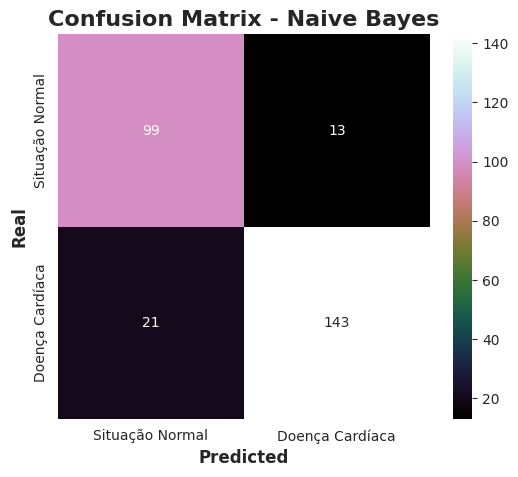

In [97]:
# Matriz de confusão

confuse_bayes = confusion_matrix(y_test, results_bayes) # gerando matriz de confusão
tags = ['Situação Normal', 'Doença Cardíaca'] # tags dos resultados

plt.figure(figsize= (6, 5)) # criando figura e definindo tamanho
sns.heatmap(confuse_bayes, annot= True, fmt= 'd', cmap='cubehelix', xticklabels= tags, yticklabels= tags) # passando matriz de confusão, mostrando números em inteiro e passando as tags
plt.title('Confusion Matrix - Naive Bayes', fontsize= 16, fontweight= 'bold') # definindo título
plt.xlabel('Predicted', fontsize= 12, fontweight= 'bold') # definindo eixo X
plt.ylabel('Real', fontsize= 12, fontweight= 'bold') # definindo eixo Y
plt.show() # plotando figura

## Rede Neural Artificial

In [ ]:
# MLPClassifier

param_grid_rn = { # dicionário de parâmetros
    'hidden_layer_sizes': [(100,), (50, 50), (50, 25)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 500],
    'random_state': [42],
    'early_stopping': [True, False],
    'validation_fraction': [0.1, 0.2],
    'batch_size': [32, 64, 128]
}

teste_rn = training_model_randomized(modelo= MLPClassifier(), x_train= x_train, y_train= y_train, param_dist= param_grid_rn, n_iter= 20)
best_params_rn = teste_rn['parametros']

In [99]:
print(f'Os melhores parâmetros testados na rede neural foram: {best_params_rn}')
print(f'O melhor score obtido da rede neural foi: {teste_rn["score"]}')

Os melhores parâmetros testados na rede neural foram: {'validation_fraction': 0.2, 'solver': 'sgd', 'random_state': 42, 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'early_stopping': False, 'batch_size': 128, 'alpha': 0.01, 'activation': 'tanh'}
O melhor score obtido da rede neural foi: 0.862875484496124


In [100]:
# Treinando modelo efetivo

neural_classifier.set_params(**best_params_rn)
neural_classifier.fit(x_train, y_train)

MLPClassifier(activation='tanh', alpha=0.01, batch_size=128,
              hidden_layer_sizes=(50, 50), learning_rate='adaptive',
              max_iter=500, random_state=42, solver='sgd',
              validation_fraction=0.2)

In [101]:
# Prevendo e obtendo taxa de acurácia

results_rn = neural_classifier.predict(x_test)
accuracy_rn = accuracy_score(y_test, results_rn)
print(f'A taxa de acurácia da rede neural foi: {accuracy_rn}')
results_algs.append(accuracy_rn)

A taxa de acurácia da rede neural foi: 0.8840579710144928


In [102]:
# Relatório de classificação

print(f'Relatório de classificação: \n{classification_report(y_test, results_rn)}')

Relatório de classificação: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       112
           1       0.93      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



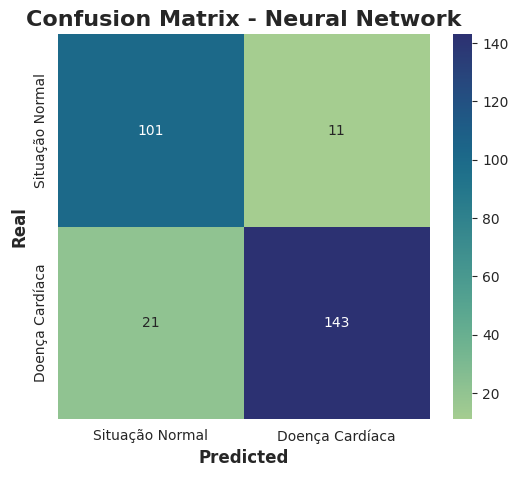

In [103]:
# Matriz de confusão

confuse_rn = confusion_matrix(y_test, results_rn) # obtendo matriz de confusão
tags = ['Situação Normal', 'Doença Cardíaca'] # tags dos resultados

plt.figure(figsize= (6, 5)) # criando figura e defindo seu tamanho
sns.heatmap(confuse_rn, annot= True, fmt= 'd', cmap= 'crest', xticklabels= tags, yticklabels= tags) # passando matriz de confusão, passando tags, mostrando os números e mudando paleta
plt.title('Confusion Matrix - Neural Network', fontsize= 16, fontweight= 'bold') # definindo título
plt.xlabel('Predicted', fontsize= 12, fontweight= 'bold') # definindo eixo X
plt.ylabel('Real', fontsize= 12, fontweight= 'bold') # definindo eixo Y
plt.show() # plotando figura

# Gráfico de comparação de algotimos

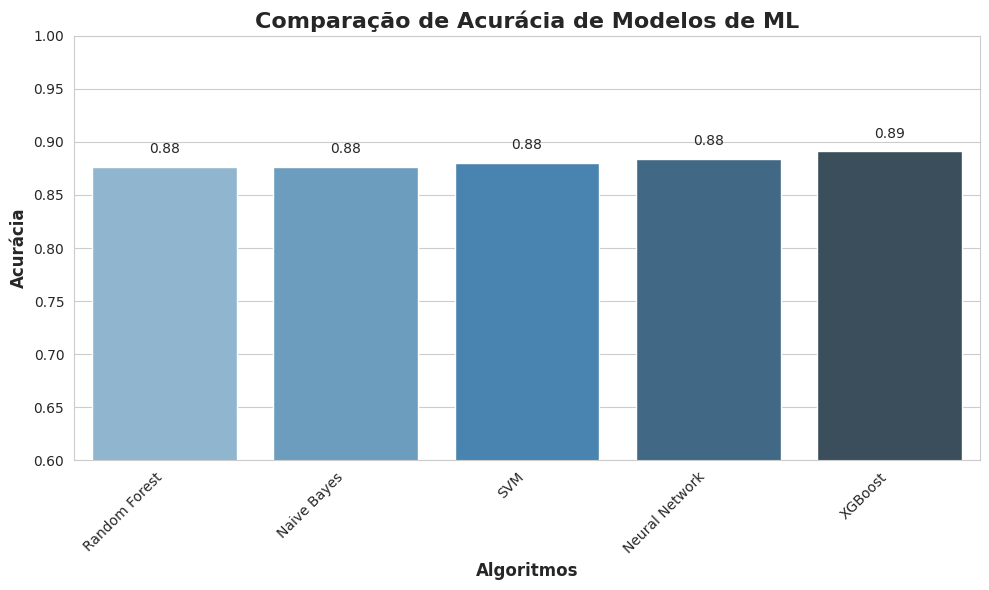

In [104]:
# Gráfico de comparação de algoritmos

algoritmos = ['XGBoost', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network'] # tags dos algoritmos testados

sorted_indices = np.argsort(results_algs)  # obtendo os índices ordenados dos resultados
algoritmos_sorted = [algoritmos[i] for i in sorted_indices]  # ordenando os algoritmos
results_sorted = [results_algs[i] for i in sorted_indices]  # ordenando os resultados


plt.figure(figsize=(10, 6)) # criando uma nova figura com tamanho personalizado
sns.set_style("whitegrid") # definindo o estilo do gráfico
sns.barplot(x=algoritmos_sorted, y=results_sorted, hue=algoritmos_sorted, palette="Blues_d", dodge=False, legend=False) # criando o gráfico de barras usando seaborn

# Adicionando os valores nas barras
for i, v in enumerate(results_sorted):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

# adicionando rótulos aos eixos x e y, e título ao gráfico
plt.xlabel('Algoritmos', fontsize=12, fontweight= 'bold')
plt.ylabel('Acurácia', fontsize=12, fontweight= 'bold')
plt.title('Comparação de Acurácia de Modelos de ML', fontsize=16, fontweight= 'bold')
plt.ylim(0.6, 1.0) # ;imitando o intervalo do eixo y para melhor visualização
plt.xticks(rotation=45, ha='right', fontsize=10) # rotacionando os rótulos do eixo x para melhor legibilidade
plt.yticks(fontsize=10) # definindo o tamanho da fonte dos rótulos do eixo y
plt.tight_layout() # ajustando o layout para evitar cortes nos rótulos
plt.show() # exibindo o gráfico